In [1]:
# 04_hierarchical_demo.ipynb (Python Code exportiert als Skript zur Vorlage)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from planners.visibility_prm import VisibilityPRM
from planners.hierarchical_planner import HierarchicalPlanner
from planners.lazy_prm import LazyPRM
from planners.basic_prm import BasicPRM
from utils.visibility_prm_visualize import visibility_prm_visualize
from utils.hierarchical_visualize import visualize_hierarchical_planning
from utils.collision_checker import CollisionChecker
from environment import get_all_scenes
import time
import pandas as pd
from scipy.spatial.distance import euclidean

In [2]:
# ---- Konfiguration für den globalen Planer (VisibilityPRM) ----
config_high = {
    "ntry": 50
}

config_low_lazy = {
    "initialRoadmapSize": 50,
    "updateRoadmapSize": 10,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 50,
    "radius": 4
}

scenes = get_all_scenes()

In [3]:
import os
import matplotlib.pyplot as plt

# 📁 Ordner für Plots & Ergebnisse
plot_dir = "plots_hierarchical"
results_dir = "benchmark_results"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# ---- Benchmark-Runner ----
def run_benchmark(subplanner_type, config_local):
    results = []
    SubPlanner = LazyPRM if subplanner_type == "Lazy" else BasicPRM
    print(f"\n🔁 Starte Benchmarks mit Subplanner: {subplanner_type}")

    for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
        print(f"\n🔍 Szene: {scene_name}")
        start = [list(start_pos)]
        goal = [list(goal_pos)]

        collision_checker = CollisionChecker(scene, limits)

        planner = HierarchicalPlanner(
            scene=scene,
            limits=limits,
            GlobalPlannerClass=VisibilityPRM,
            LocalPlannerClass=SubPlanner,
            config_global=config_high,
            config_local=config_local
        )

        t0 = time.time()
        path = planner.plan_path(start, goal)
        t1 = time.time()

        coords = planner.get_solution_path() if path else []
        euclidean_length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:])) if coords else 0

        if not path:
            print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
            result = {
                "planner": f"Hierarchical-{subplanner_type}",
                "scene": scene_name,
                "hasPath": False,
                "length": 0,
                "euclidean_length": 0,
                "time": t1 - t0,
                "nodes": 0,
                "edges": 0,
                "roadmap_size": 0
            }
            results.append(result)
            continue

        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(path)}")
        planner.solution_path = path
        planner.graph = planner.global_planner.graph

        # 📸 Visualisierung speichern
        visualize_hierarchical_planning(planner, collision_checker, config_local)
        filename = f"{scene_name}_Hierarchical-{subplanner_type}.png".replace(" ", "_")
        plt.savefig(os.path.join(plot_dir, filename), dpi=300)
        plt.close()

        result = {
            "planner": f"Hierarchical-{subplanner_type}",
            "scene": scene_name,
            "hasPath": True,
            "length": len(path),
            "euclidean_length": euclidean_length,
            "time": t1 - t0,
            "nodes": len(planner.graph.nodes),
            "edges": len(planner.graph.edges),
            "roadmap_size": planner.graph.size()
        }
        results.append(result)

    return results



🔁 Starte Benchmarks mit Subplanner: Lazy

🔍 Szene: U-Shape
Globaler Pfad: ['start', 56, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([5.45879154, 3.90263002]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [5.45879154 3.90263002]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [5.45879154 3.90263002]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.729395769360547)), (np.float64(3.951315007871605), np.float64(19.951315007871607)))
Segment 1: [5.45879154 3.90263002] → [20.0, 2.0]
→ Lokaler Planner für Segment 1: [5.45879154 3.90263002] → [20.0, 2.0]
   Lokale Begrenzung (geclipped): ((np.float64(4.729395769360547), np.float64(20.729395769360547)), (0, np.float64(10.951315007871607)))
✅ Pfad gefunden in Szene: U-Shape, Länge: 12


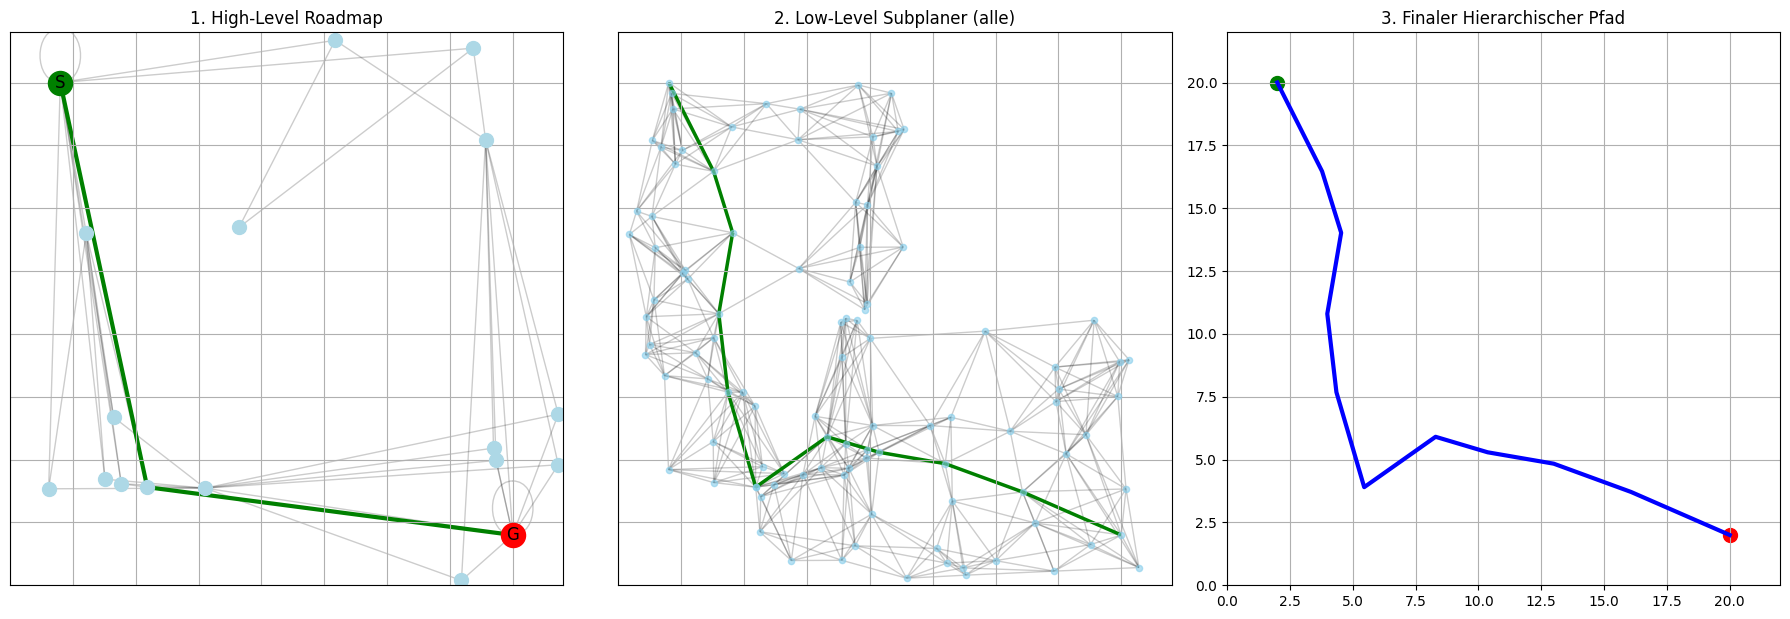


🔍 Szene: L-Shape
Globaler Pfad: ['start', 33, 1, 41, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([0.67191583, 1.21142127]), array([17.15088578,  6.2316449 ]), array([18.98315181, 16.72138575]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [0.67191583 1.21142127]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [0.67191583 1.21142127]
   Lokale Begrenzung (geclipped): ((0, np.float64(2.880517389408312)), (np.float64(0.06115116230819373), np.float64(3.1502701124439523)))
Segment 1: [0.67191583 1.21142127] → [17.15088578  6.2316449 ]
→ Lokaler Planner für Segment 1: [0.67191583 1.21142127] → [17.15088578  6.2316449 ]
   Lokale Begrenzung (geclipped): ((np.float64(0.911400803855754), np.float64(16.911400803855756)), (0, np.float64(11.72153308958844)))
Segment 2: [17.15088578  6.2316449 ] → [18.98315181 16.72138575]
→ Lokaler Planner für Segment 2: [17.15088578  6.2316449 ] → [18.98315181 16.72138575]
   Lokale Begrenzung (geclipped): ((np.float64(10.067018794127208), 22), (np.float64

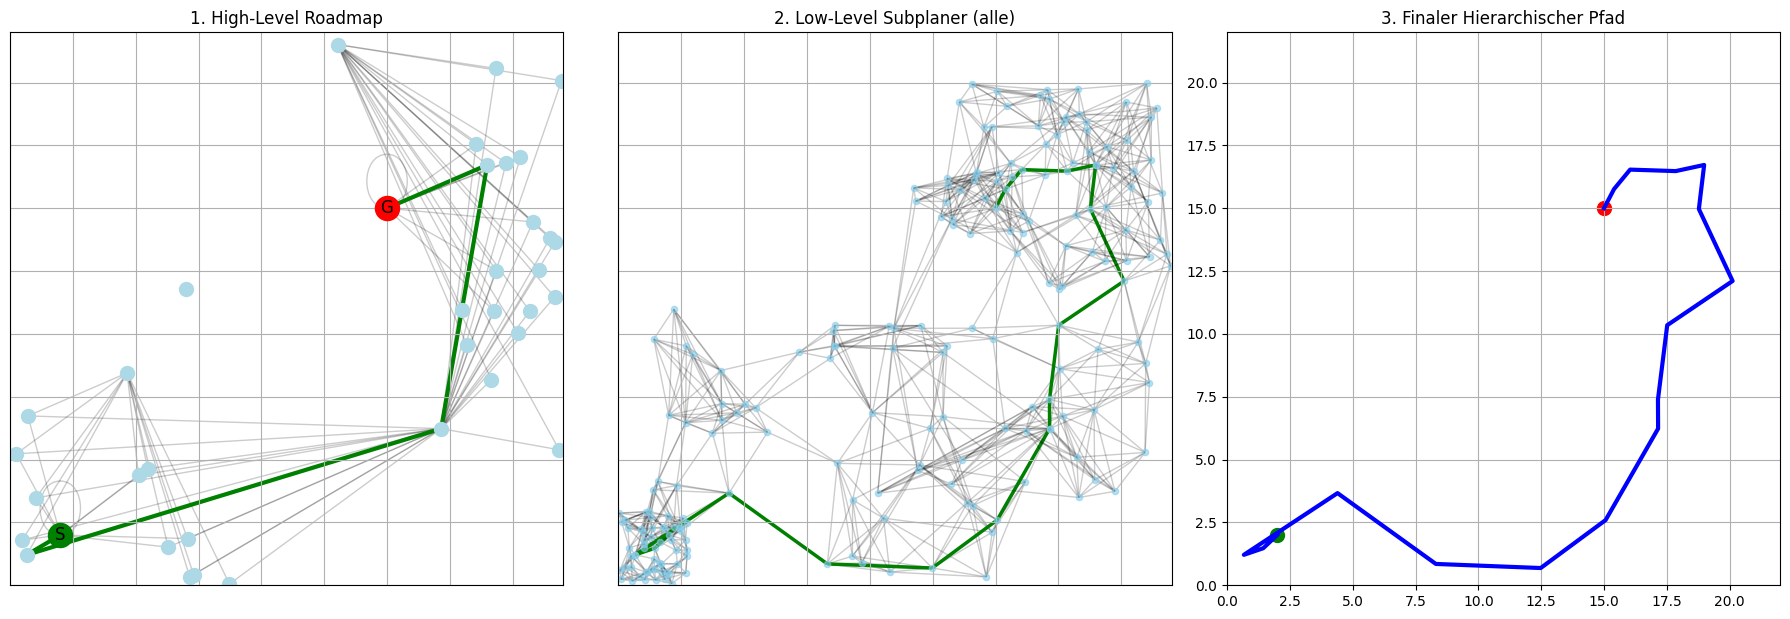


🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Globaler Pfad: ['start', 76, 1, 8, 3, 24, 12, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([ 4.17216424, 11.81590097]), array([ 6.40971476, 12.60359338]), array([ 6.54747706, 19.00580868]), array([ 0.90835991, 19.58366388]), array([19.02199109, 19.23023801]), array([17.75972891,  4.38268681]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [ 4.17216424 11.81590097]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [ 4.17216424 11.81590097]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.452072074433596)), (np.float64(1.541960529249054), np.float64(15.273940439531323)))
Segment 1: [ 4.17216424 11.81590097] → [ 6.40971476 12.60359338]
→ Lokaler Planner für Segment 1: [ 4.17216424 11.81590097] → [ 6.40971476 12.60359338]
   Lokale Begrenzung (geclipped): ((np.float64(2.9187903333194494), np.float64(7.663088663050278)), (np.float64(9.837598009431797), np.float64

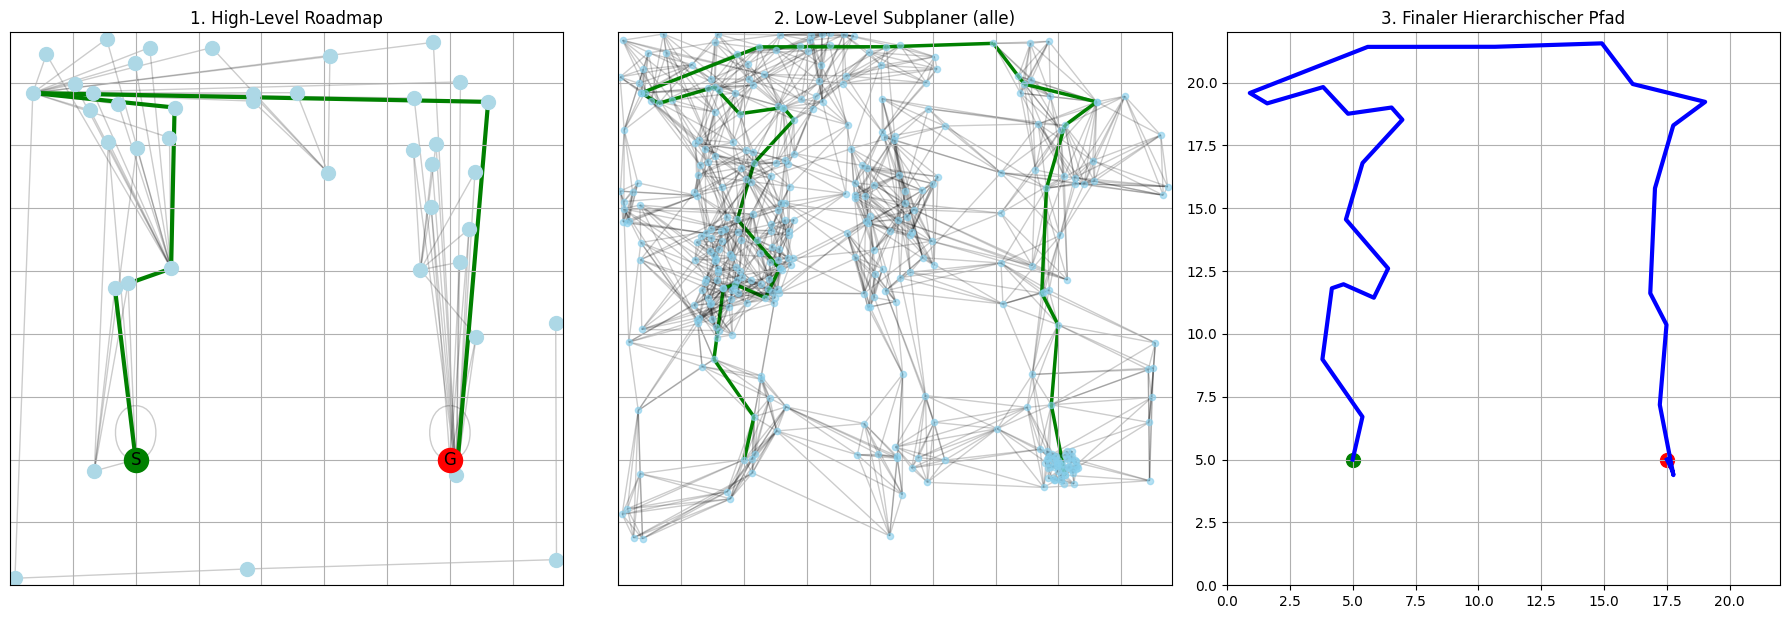


🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 73, 24, 36, 1, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([3.67753937, 0.7267894 ]), array([3.81739184, 9.01684484]), array([ 3.55797401, 18.49199027]), array([ 2.79993365, 21.3558215 ]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [3.67753937 0.7267894 ]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [3.67753937 0.7267894 ]
   Lokale Begrenzung (geclipped): ((0, np.float64(5.030211879005468)), (0, np.float64(3.5548368936300525)))
Segment 1: [3.67753937 0.7267894 ] → [3.81739184 9.01684484]
→ Lokaler Planner für Segment 1: [3.67753937 0.7267894 ] → [3.81739184 9.01684484]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.747465602074346)), (0, np.float64(12.871817116309682)))
❌ Keine lokale Verbindung zwischen [3.67753937 0.7267894 ] und [3.81739184 9.01684484].
❌ Kein Pfad gefunden in Szene: Multiple Obstacles

🔍 Szene: Crossed Obstacles
Globaler Pfad: ['start', 4, 49, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0],

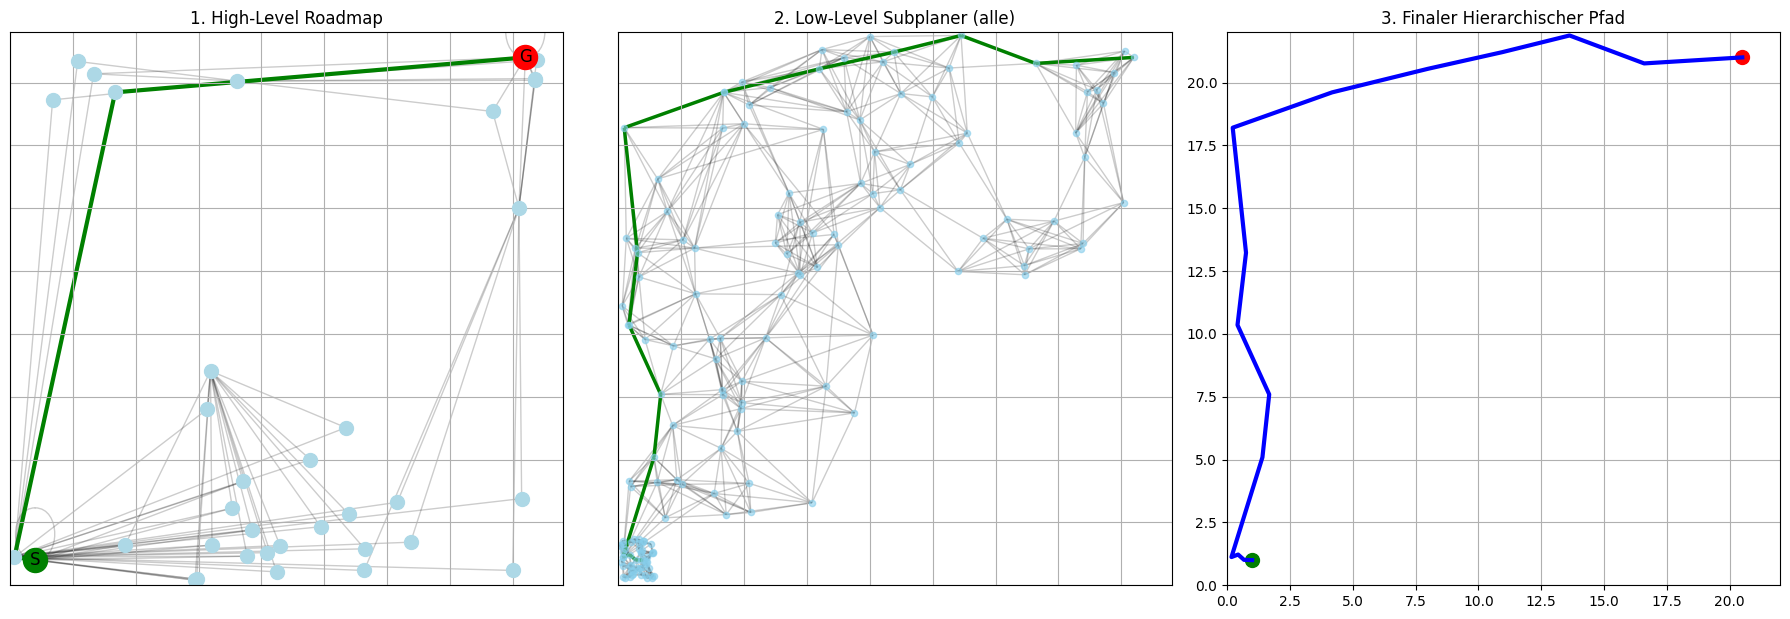


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 5, 2, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([10.53895088,  1.74327949]), array([14.2249132 , 15.92577494]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [10.53895088  1.74327949]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [10.53895088  1.74327949]
   Lokale Begrenzung (geclipped): ((0, np.float64(13.769475437536013)), (0, np.float64(9.371639745046021)))
Segment 1: [10.53895088  1.74327949] → [14.2249132  15.92577494]
→ Lokaler Planner für Segment 1: [10.53895088  1.74327949] → [14.2249132  15.92577494]
   Lokale Begrenzung (geclipped): ((np.float64(4.381932039064559), np.float64(20.38193203906456)), (np.float64(0.8345272167801685), np.float64(16.834527216780167)))
Segment 2: [14.2249132  15.92577494] → [19.0, 19.0]
→ Lokaler Planner für Segment 2: [14.2249132  15.92577494] → [19.0, 19.0]
   Lokale Begrenzung (geclipped): ((np.float64(10.933344556803082), 22), (np.float64(11.783775427008685), 22))
✅ Pfad gefunden in Sz

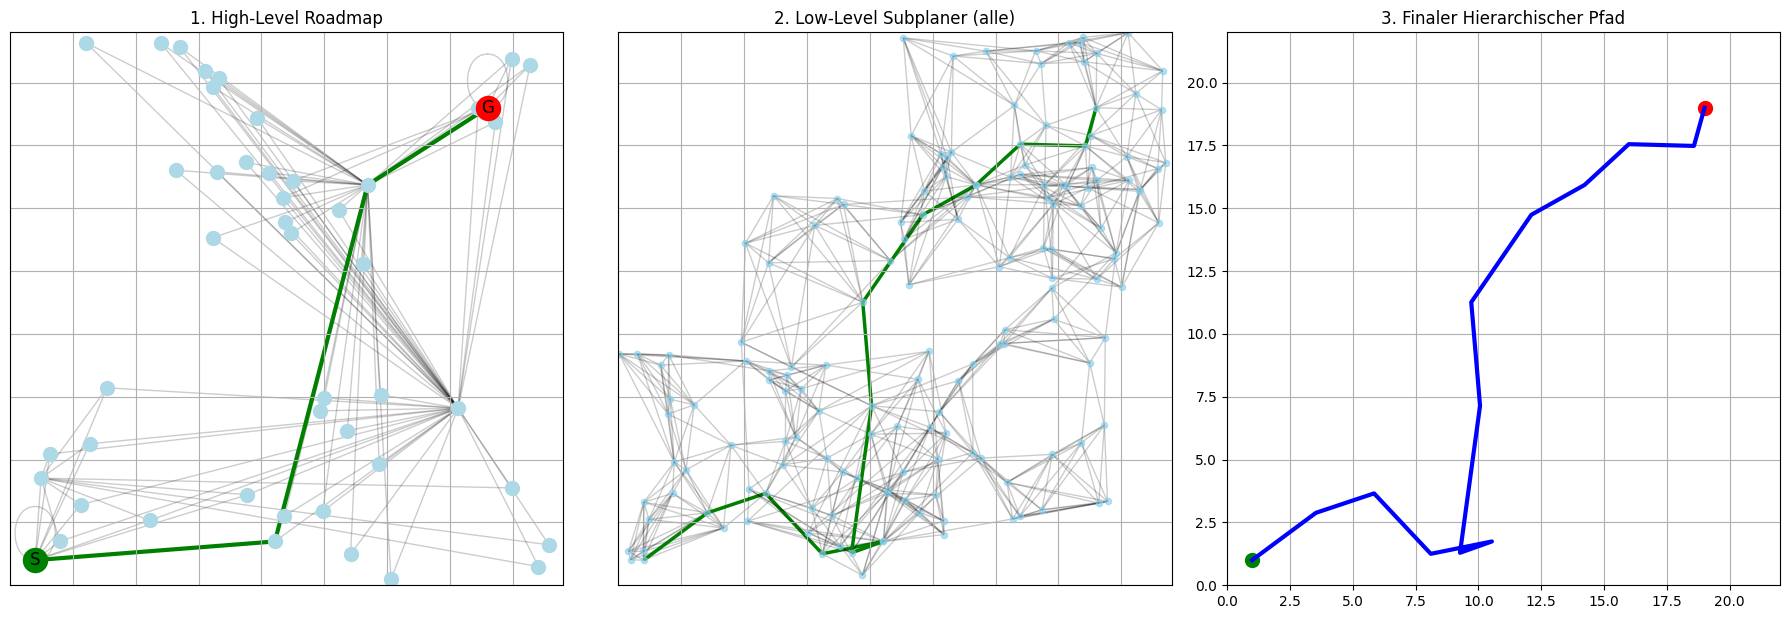


🔁 Starte Benchmarks mit Subplanner: Basic

🔍 Szene: U-Shape
Globaler Pfad: ['start', 0, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([2.31614017, 1.27616035]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [2.31614017 1.27616035]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [2.31614017 1.27616035]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.158070083645145)), (np.float64(2.6380801729924617), np.float64(18.63808017299246)))
❌ Keine lokale Verbindung zwischen [2.0, 20.0] und [2.31614017 1.27616035].
❌ Kein Pfad gefunden in Szene: U-Shape

🔍 Szene: L-Shape
Globaler Pfad: ['start', 41, 0, 42, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([11.02014614,  3.81609142]), array([20.01098137,  8.687732  ]), array([16.50703401, 16.20334768]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [11.02014614  3.81609142]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [11.02014614  3.81609142]
   Lokale Begrenzung (geclipped): ((0, np.float64(14.51007307075734)), (0, np.float64(10.90

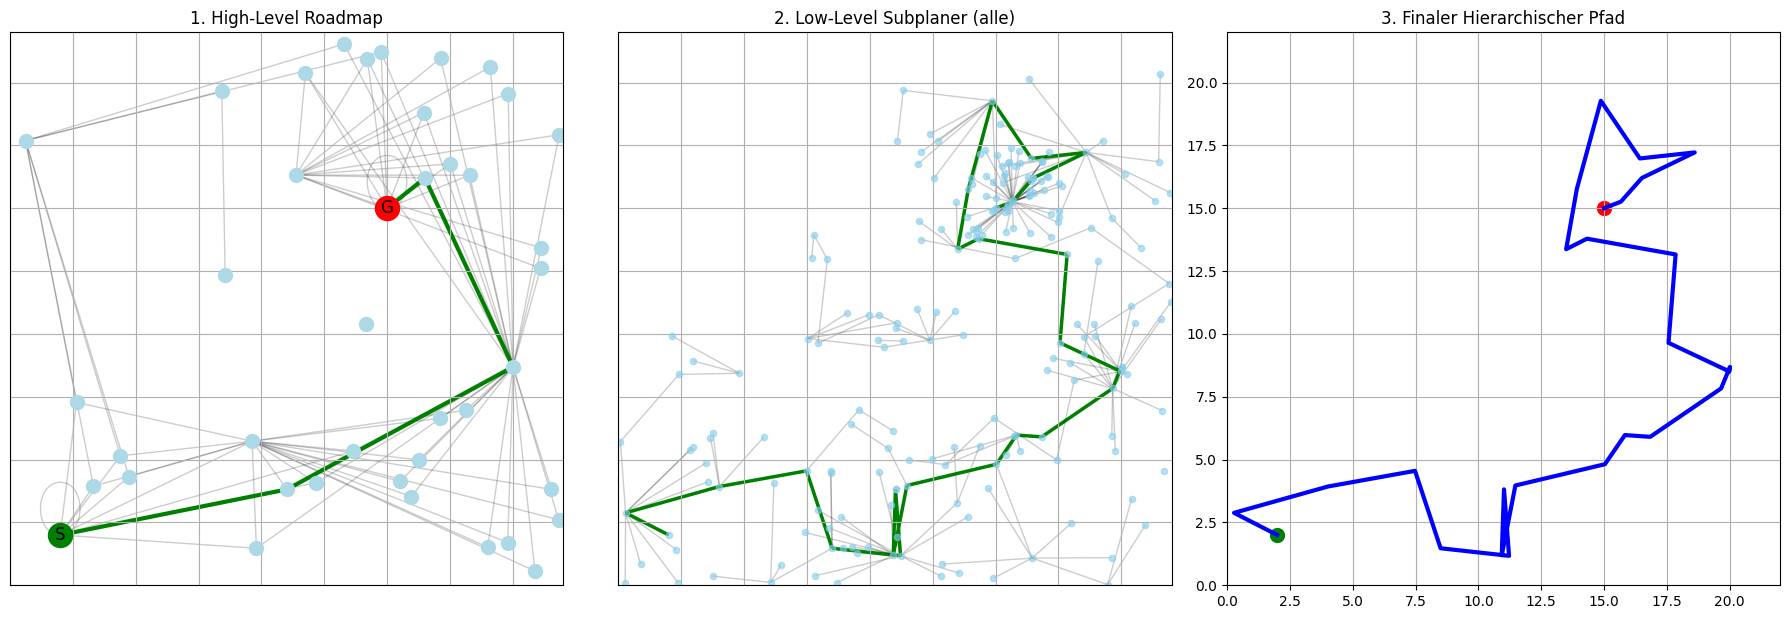


🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Complex Shape

🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 79, 74, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([5.24468103, 0.18255865]), array([ 5.47784602, 15.21186841]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [5.24468103 0.18255865]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [5.24468103 0.18255865]
   Lokale Begrenzung (geclipped): ((0, np.float64(7.445016468820103)), (0, np.float64(4.913955279169154)))
Segment 1: [5.24468103 0.18255865] → [ 5.47784602 15.21186841]
→ Lokaler Planner für Segment 1: [5.24468103 0.18255865] → [ 5.47784602 15.21186841]
   Lokale Begrenzung (geclipped): ((0, np.float64(13.361263526745468)), (0, np.float64(15.697213532513535)))
❌ Keine lokale Verbindung zwischen [5.24468103 0.18255865] und [ 5.47784602 15.21186841].
❌ Kein Pfad gefunden

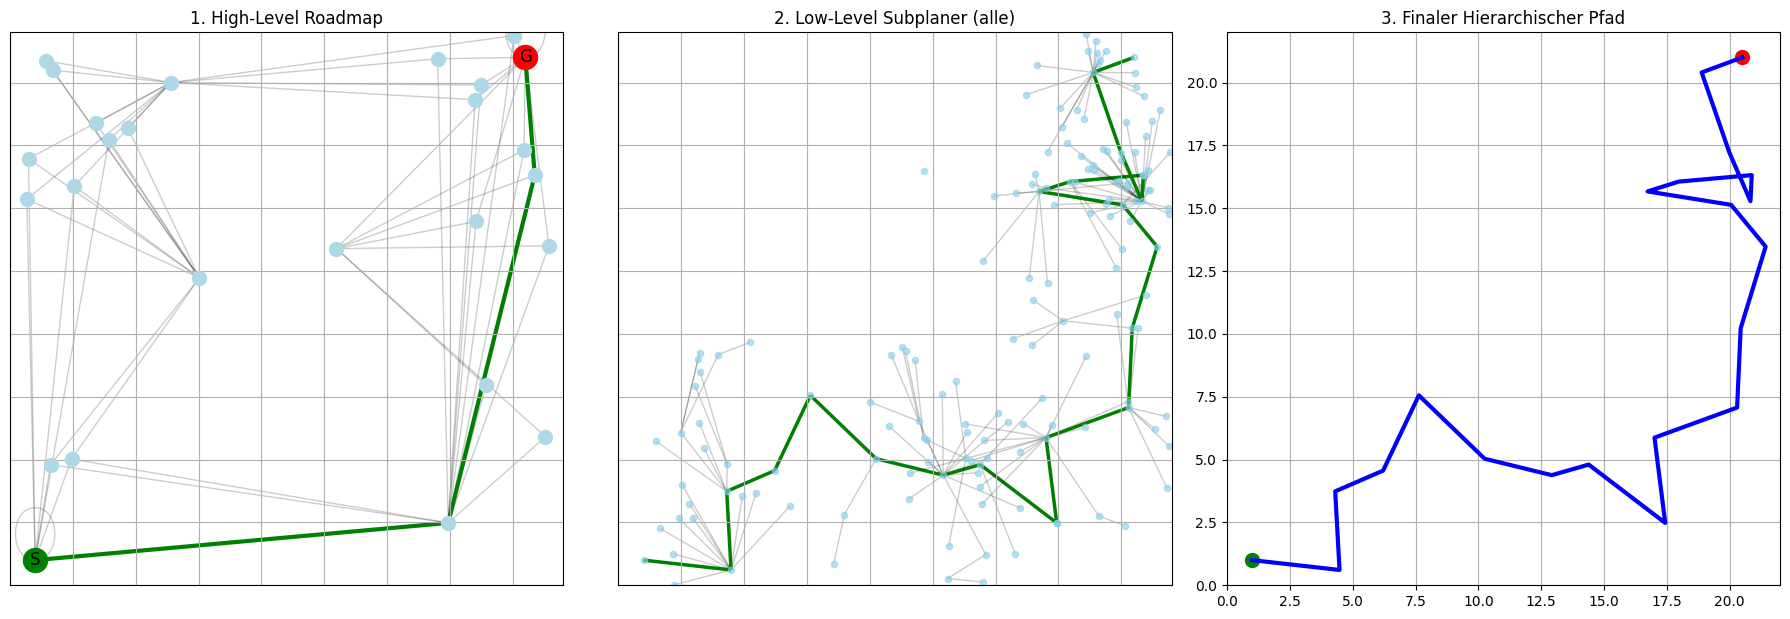


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 3, 27, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([2.58595927, 8.04963946]), array([15.11531984, 17.35324629]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [2.58595927 8.04963946]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [2.58595927 8.04963946]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.018814065533066)), (0, np.float64(11.750654159986379)))
Segment 1: [2.58595927 8.04963946] → [15.11531984 17.35324629]
→ Lokaler Planner für Segment 1: [2.58595927 8.04963946] → [15.11531984 17.35324629]
   Lokale Begrenzung (geclipped): ((np.float64(0.850639550916096), np.float64(16.850639550916096)), (np.float64(4.701442874763213), np.float64(20.701442874763213)))
❌ Keine lokale Verbindung zwischen [2.58595927 8.04963946] und [15.11531984 17.35324629].
❌ Kein Pfad gefunden in Szene: Random Obstacles

✅ Alle Benchmarks abgeschlossen.


In [4]:
# ---- Beide Varianten durchlaufen ----
all_results = []

# Lazy-Run
lazy_results = run_benchmark("Lazy", config_low_lazy)
lazy_df = pd.DataFrame(lazy_results)
lazy_df.to_csv(os.path.join(results_dir, "Hierarchical-Lazy_results.csv"), index=False)
all_results.extend(lazy_results)

# Basic-Run
basic_results = run_benchmark("Basic", config_low_basic)
basic_df = pd.DataFrame(basic_results)
basic_df.to_csv(os.path.join(results_dir, "Hierarchical-Basic_results.csv"), index=False)
all_results.extend(basic_results)

# Optional: Zusammengefasst
all_df = pd.DataFrame(all_results)
all_df.to_csv(os.path.join(results_dir, "Hierarchical_ALL_results.csv"), index=False)

print("\n✅ Alle Benchmarks abgeschlossen.")

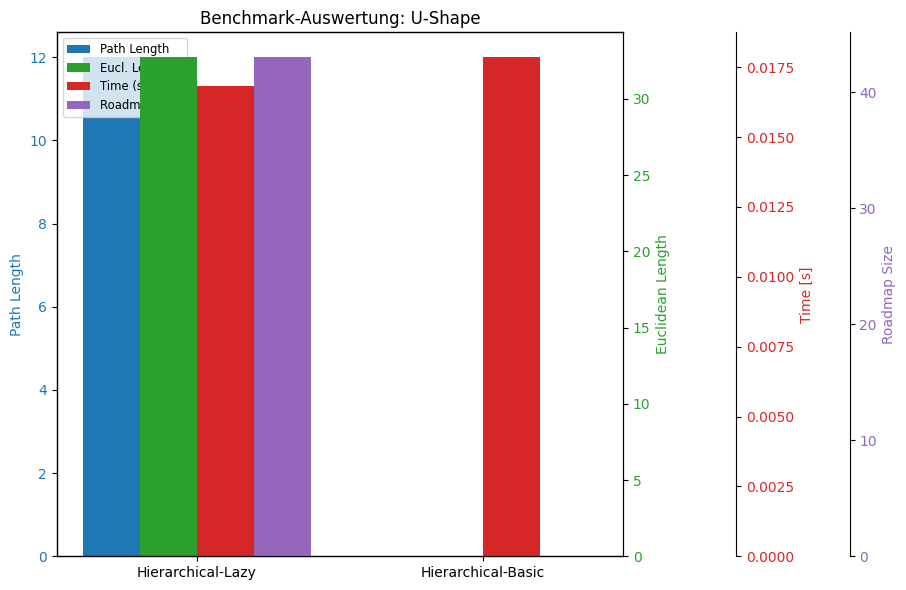

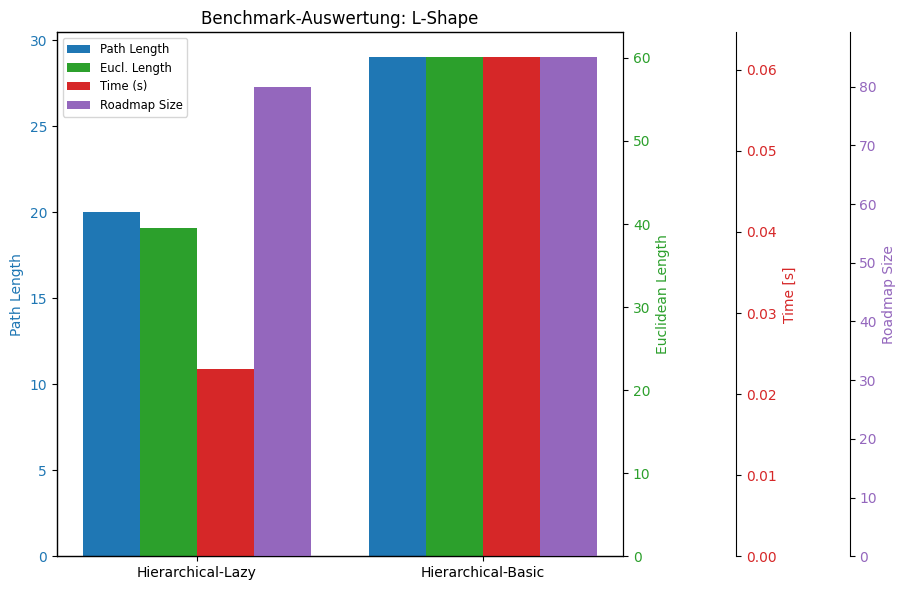

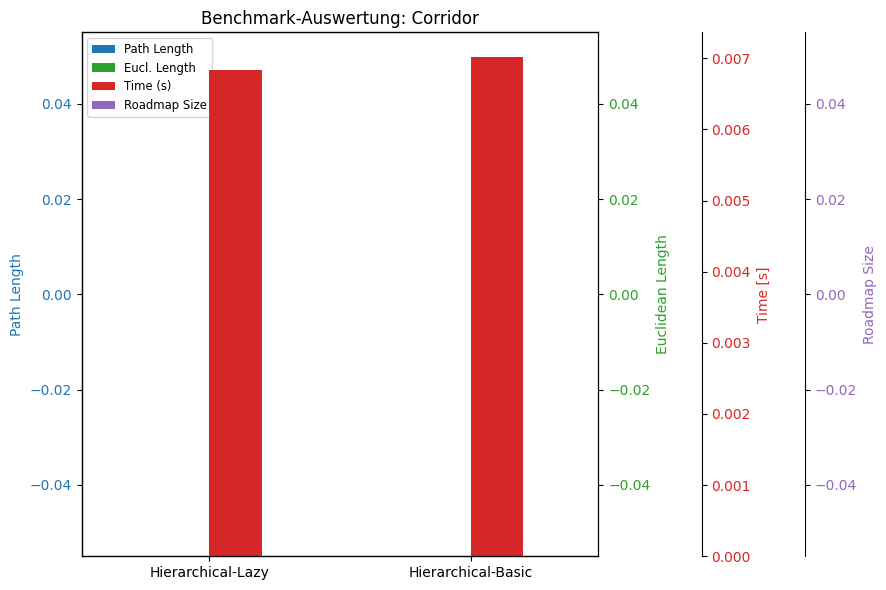

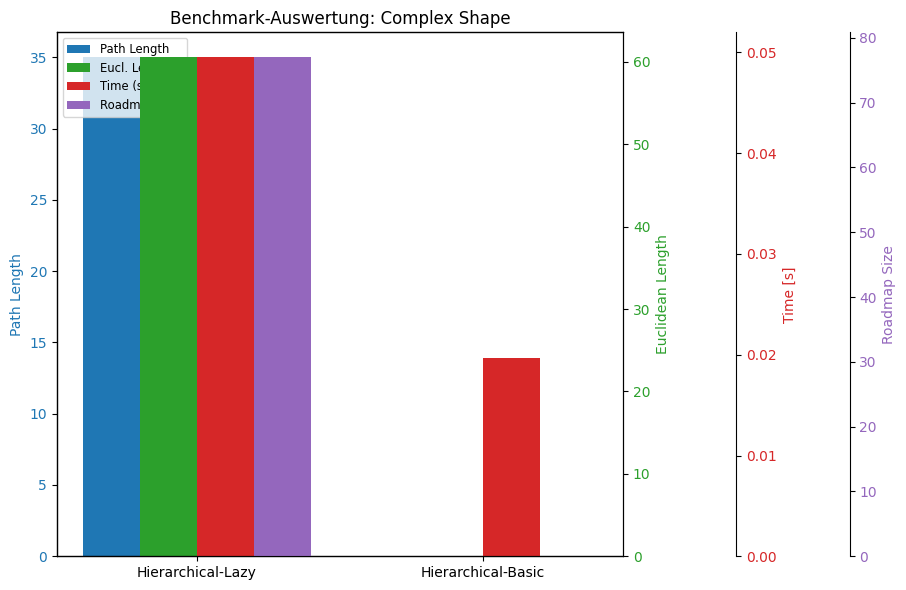

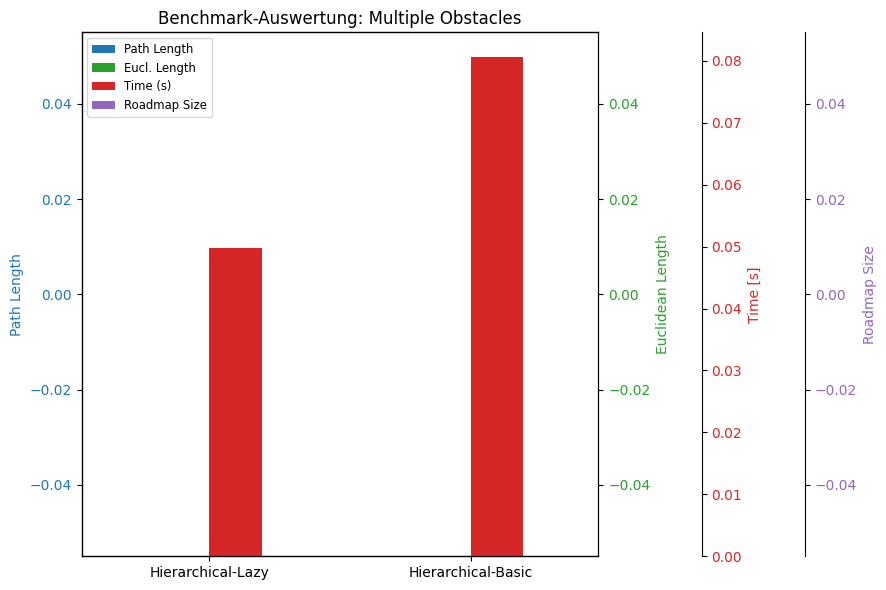

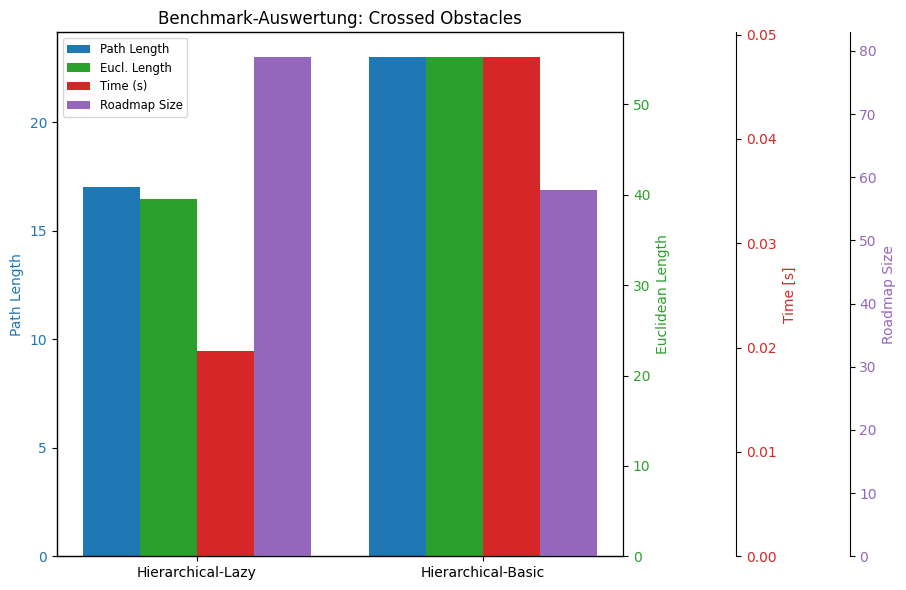

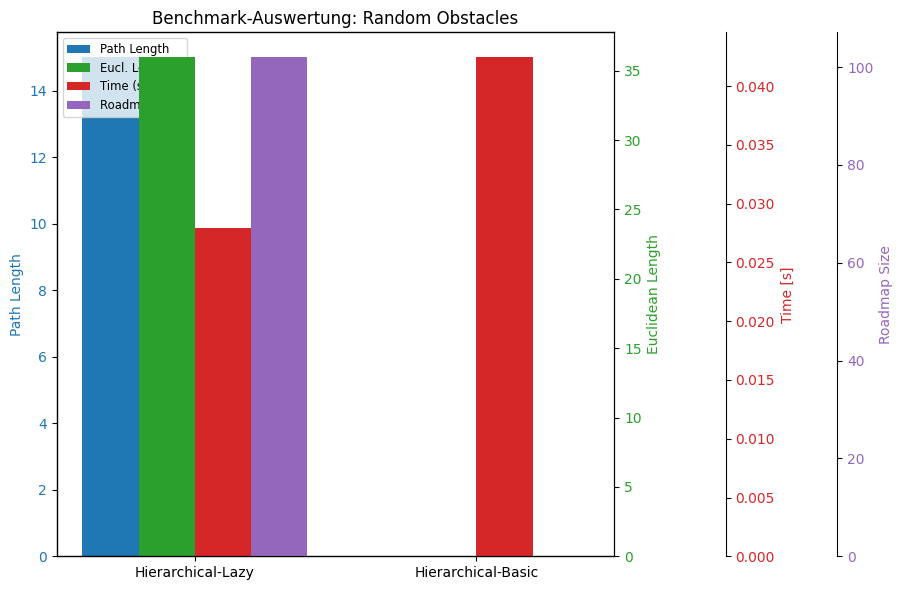

In [5]:
# Visualisierung
result_df = pd.DataFrame(all_results)
for scene in result_df["scene"].unique():
    df = result_df[result_df["scene"] == scene]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    width = 0.2
    idx = np.arange(len(df))

    ax1.bar(idx, df["length"], width, label="Path Length", color="#1f77b4")
    ax1.set_ylabel("Path Length", color="#1f77b4")
    ax1.tick_params(axis='y', labelcolor="#1f77b4")

    ax2 = ax1.twinx()
    ax2.bar(idx + width, df["euclidean_length"], width, label="Eucl. Length", color="#2ca02c")
    ax2.set_ylabel("Euclidean Length", color="#2ca02c")
    ax2.tick_params(axis='y', labelcolor="#2ca02c")

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.bar(idx + 2 * width, df["time"], width, label="Time (s)", color="#d62728")
    ax3.set_ylabel("Time [s]", color="#d62728")
    ax3.tick_params(axis='y', labelcolor="#d62728")

    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('axes', 1.4))
    ax4.bar(idx + 3 * width, df["roadmap_size"], width, label="Roadmap Size", color="#9467bd")
    ax4.set_ylabel("Roadmap Size", color="#9467bd")
    ax4.tick_params(axis='y', labelcolor="#9467bd")

    ax1.set_xticks(idx + 1.5 * width)
    ax1.set_xticklabels(df["planner"].values)
    ax1.set_title(f"Benchmark-Auswertung: {scene}")

    handles, labels = [], []
    for ax in [ax1, ax2, ax3, ax4]:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    ax1.legend(handles, labels, loc="upper left", fontsize="small")

    plt.tight_layout()
    plt.show()

Globaler Pfad: ['start', 12, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([3.29787983, 5.95559439]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [3.29787983 5.95559439]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [3.29787983 5.95559439]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.648939916391273)), (np.float64(4.977797192915835), np.float64(20.977797192915837)))
Segment 1: [3.29787983 5.95559439] → [20.0, 2.0]
→ Lokaler Planner für Segment 1: [3.29787983 5.95559439] → [20.0, 2.0]
   Lokale Begrenzung (geclipped): ((np.float64(3.648939916391271), np.float64(19.64893991639127)), (0, np.float64(11.977797192915835)))
✅ Pfad gefunden mit 13 Punkten


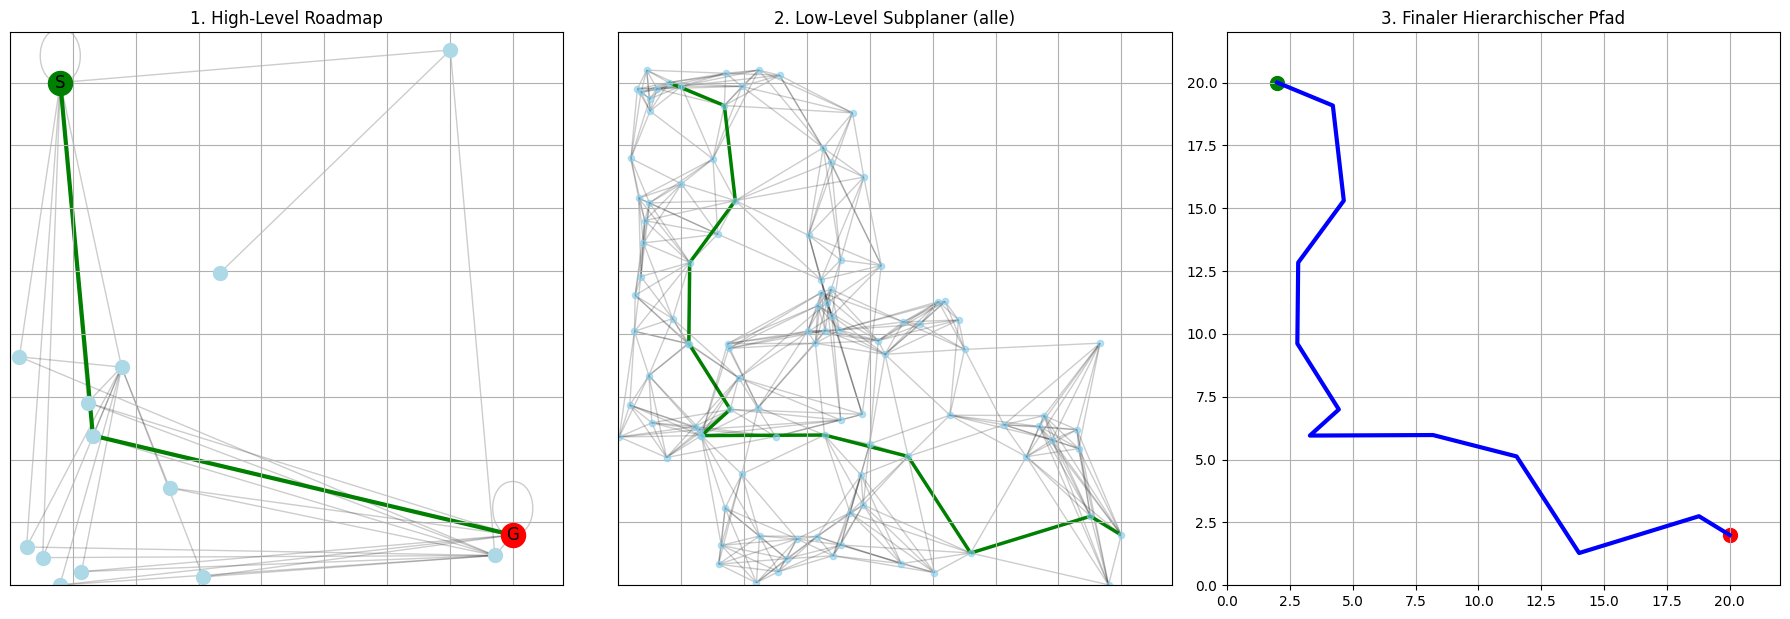

In [6]:
# --- Pfadplanung ---
hier_planner = HierarchicalPlanner(
    scene=scenes[0][1][0],  # Nimm die erste Szene
    limits=scenes[0][1][1],
    GlobalPlannerClass=VisibilityPRM,
    LocalPlannerClass=LazyPRM,  # Oder BasicPRM
    config_global=config_high,
    config_local=config_low_lazy  # Oder config_low_basic
)

start = [list(scenes[0][1][2][0])]
goal = [list(scenes[0][1][2][1])]
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)



🔄 Verarbeite Szene: U-Shape
Globaler Pfad: ['start', 2, 1, 14, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([ 1.99065419, 20.89630455]), array([4.54236162, 4.80504003]), array([17.78156441,  3.19564185]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [ 1.99065419 20.89630455]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [ 1.99065419 20.89630455]
   Lokale Begrenzung (geclipped): ((np.float64(1.0989738231281043), np.float64(2.8916803636499826)), (np.float64(19.551799003213908), np.float64(21.344505543735785)))
Segment 1: [ 1.99065419 20.89630455] → [4.54236162 4.80504003]
→ Lokaler Planner für Segment 1: [ 1.99065419 20.89630455] → [4.54236162 4.80504003]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.266507903235087)), (np.float64(4.850672286955579), np.float64(20.85067228695558)))
Segment 2: [4.54236162 4.80504003] → [17.78156441  3.19564185]
→ Lokaler Planner für Segment 2: [4.54236162 4.80504003] → [17.78156441  3.19564185]
   Lokale Begrenzung (geclipped): ((np.floa

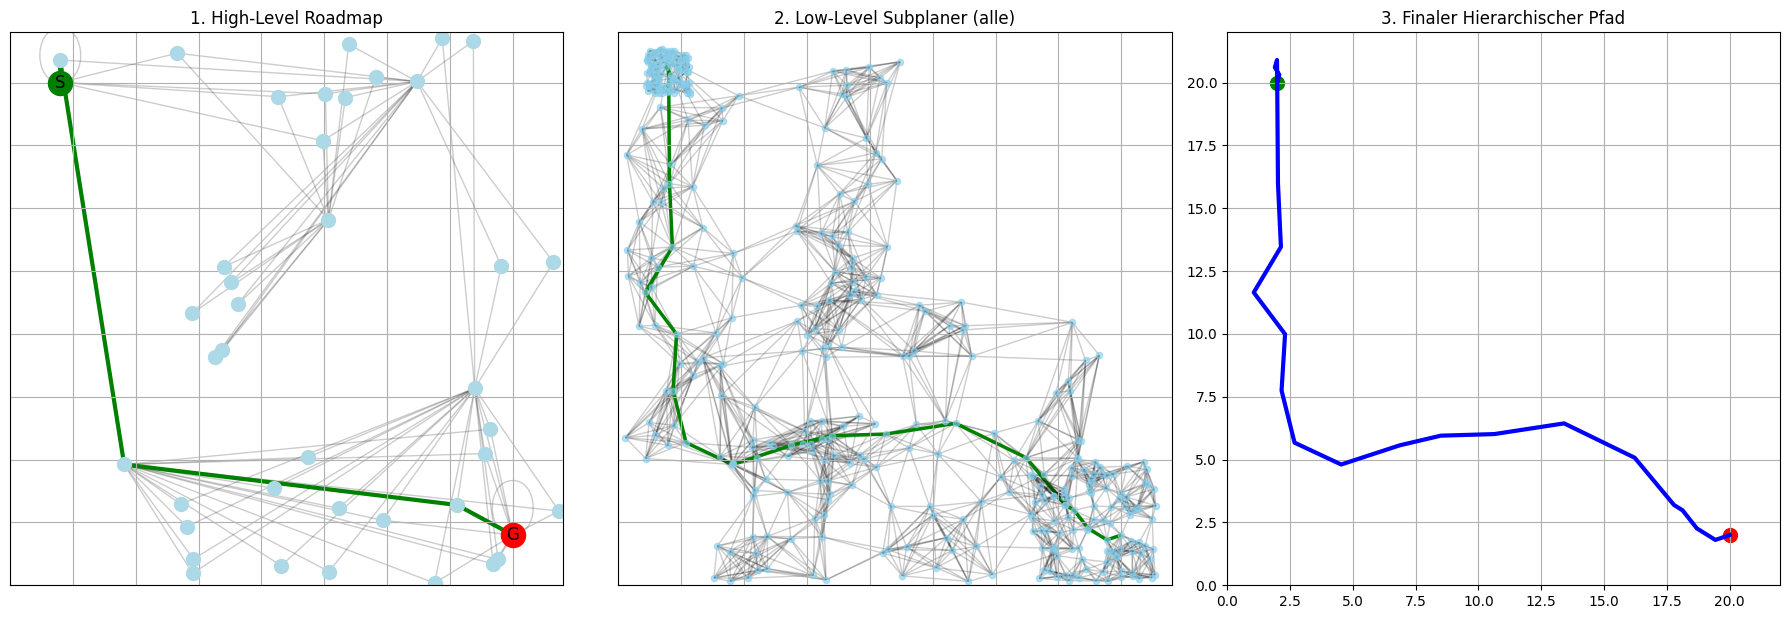


🔄 Verarbeite Szene: L-Shape
Globaler Pfad: ['start', 66, 0, 24, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([1.70334676, 2.25127658]), array([12.84150812,  0.76226929]), array([19.60570756, 10.34501119]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [1.70334676 2.25127658]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [1.70334676 2.25127658]
   Lokale Begrenzung (geclipped): ((np.float64(1.351673380701924), np.float64(2.351673380701924)), (np.float64(1.6256382880499598), np.float64(2.62563828804996)))
Segment 1: [1.70334676 2.25127658] → [12.84150812  0.76226929]
→ Lokaler Planner für Segment 1: [1.70334676 2.25127658] → [12.84150812  0.76226929]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.272427438886986)), (0, np.float64(9.506772933070911)))
Segment 2: [12.84150812  0.76226929] → [19.60570756 10.34501119]
→ Lokaler Planner für Segment 2: [12.84150812  0.76226929] → [19.60570756 10.34501119]
   Lokale Begrenzung (geclipped): ((np.float64(8.22360783617799), 22), (0, n

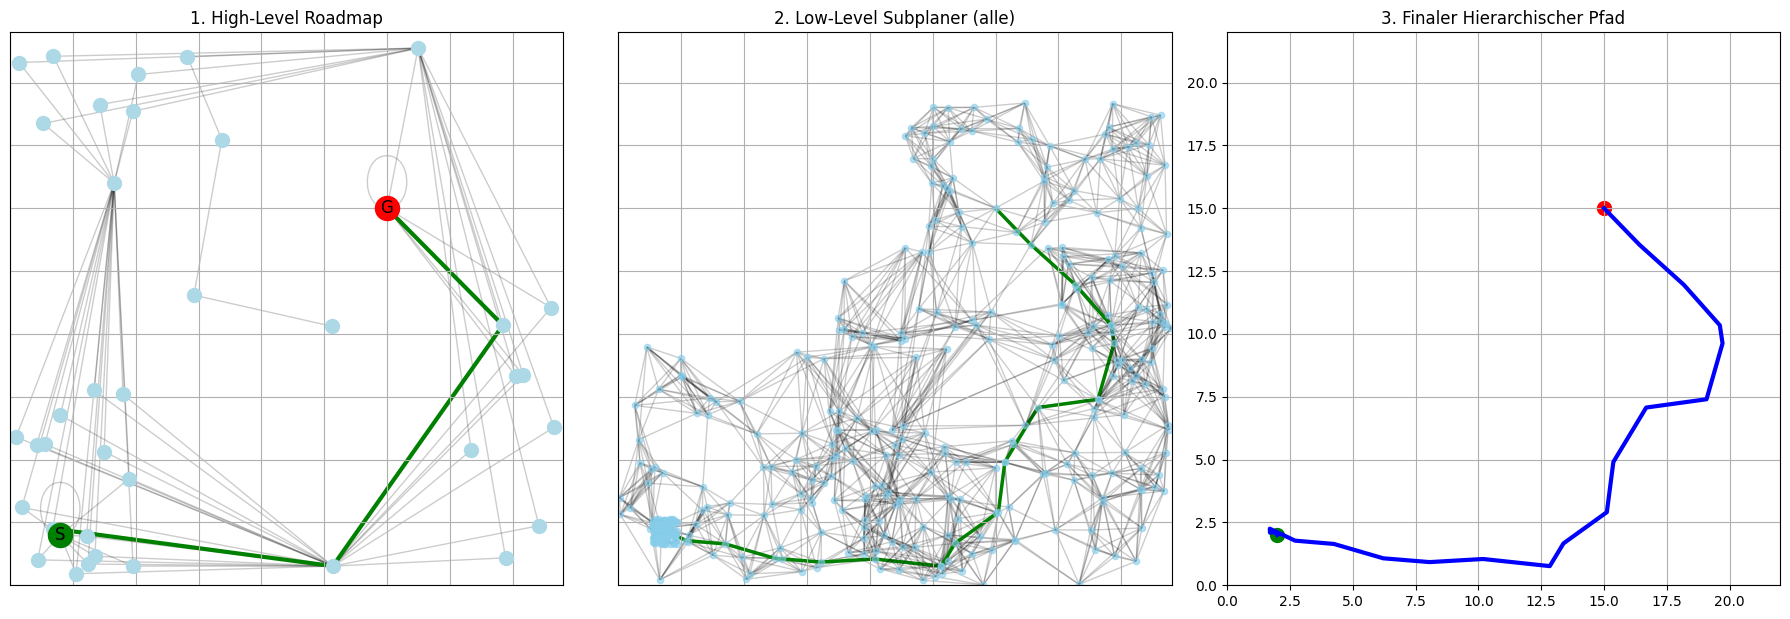


🔄 Verarbeite Szene: Corridor
Globaler Pfad: ['start', 33, 0, 75, 40, 76, 'goal']
Koordinaten des globalen Pfads: [[10.0, 5.0], array([14.99752947,  2.42197692]), array([2.99721863, 1.47416611]), array([ 0.77877937, 18.08277413]), array([ 4.48691432, 18.10986327]), array([ 8.77153944, 17.98178422]), [10.0, 15.0]]
Segment 0: [10.0, 5.0] → [14.99752947  2.42197692]
→ Lokaler Planner für Segment 0: [10.0, 5.0] → [14.99752947  2.42197692]
   Lokale Begrenzung (geclipped): ((np.float64(6.875464652701077), np.float64(18.12206481811257)), (0, np.float64(9.334288541978944)))
Segment 1: [14.99752947  2.42197692] → [2.99721863 1.47416611]
→ Lokaler Planner für Segment 1: [14.99752947  2.42197692] → [2.99721863 1.47416611]
   Lokale Begrenzung (geclipped): ((np.float64(0.9973740524209163), np.float64(16.997374052420916)), (0, np.float64(9.948071514777633)))
Segment 2: [2.99721863 1.47416611] → [ 0.77877937 18.08277413]
→ Lokaler Planner für Segment 2: [2.99721863 1.47416611] → [ 0.77877937 18.082

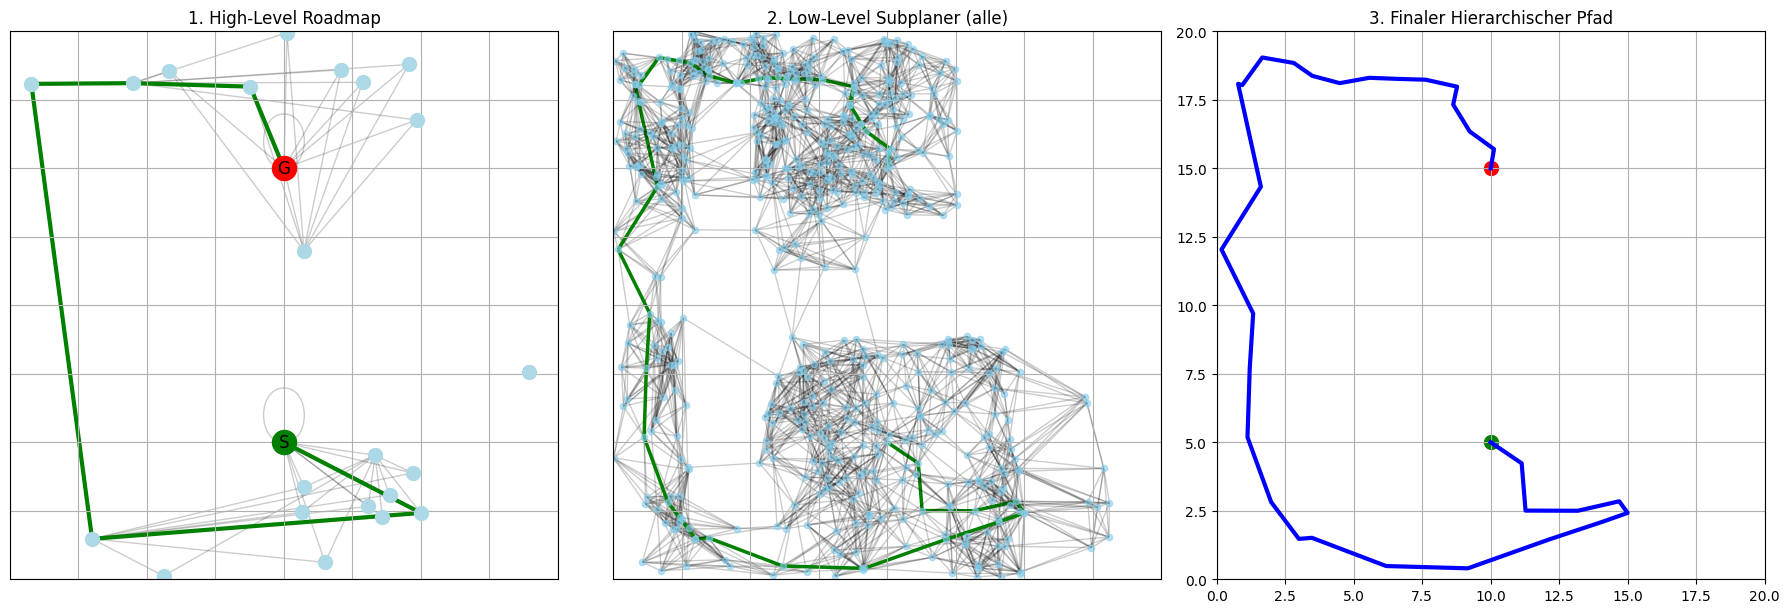


🔄 Verarbeite Szene: Complex Shape
Globaler Pfad: ['start', 0, 4, 1, 25, 24, 51, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([3.88867851, 3.61088543]), array([ 6.00890895, 18.56202769]), array([ 8.29272878, 19.51439313]), array([19.95614774, 20.90361733]), array([16.94068448, 16.43926409]), array([17.96397853,  5.40342166]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [3.88867851 3.61088543]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [3.88867851 3.61088543]
   Lokale Begrenzung (geclipped): ((np.float64(2.6653859854931703), np.float64(6.2232925294070895)), (np.float64(2.5264894408877474), np.float64(6.084395984801667)))
Segment 1: [3.88867851 3.61088543] → [ 6.00890895 18.56202769]
→ Lokaler Planner für Segment 1: [3.88867851 3.61088543] → [ 6.00890895 18.56202769]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.94879373172719)), (np.float64(3.0864565570211315), np.float64(19.08645655702113)))
Segment 2: [ 6.00890895 18.56202769] → [ 8.29272878 19.51439313]
→ Lokaler Pl

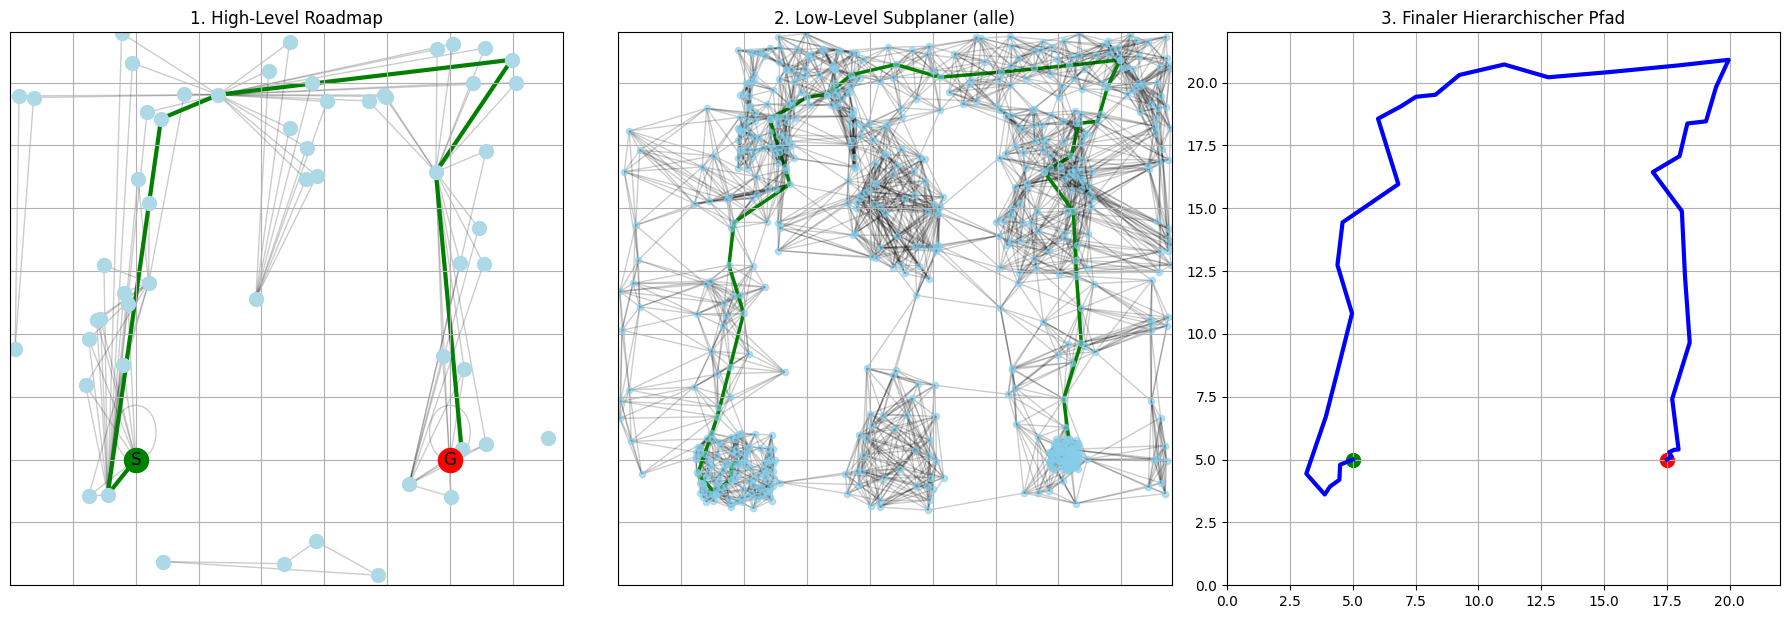


🔄 Verarbeite Szene: Multiple Obstacles
Globaler Pfad: ['start', 16, 3, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([7.16068784, 0.76389637]), array([ 7.49830157, 20.21109763]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [7.16068784 0.76389637]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [7.16068784 0.76389637]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.245554343078968)), (0, np.float64(7.0471586089993865)))
Segment 1: [7.16068784 0.76389637] → [ 7.49830157 20.21109763]
→ Lokaler Planner für Segment 1: [7.16068784 0.76389637] → [ 7.49830157 20.21109763]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.329494706634607)), (np.float64(2.487496999247716), np.float64(18.487496999247718)))
❌ Keine lokale Verbindung zwischen [7.16068784 0.76389637] und [ 7.49830157 20.21109763].
❌ Kein Pfad gefunden in Szene: Multiple Obstacles

🔄 Verarbeite Szene: Crossed Obstacles
Globaler Pfad: ['start', 9, 0, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([8.4455753 , 

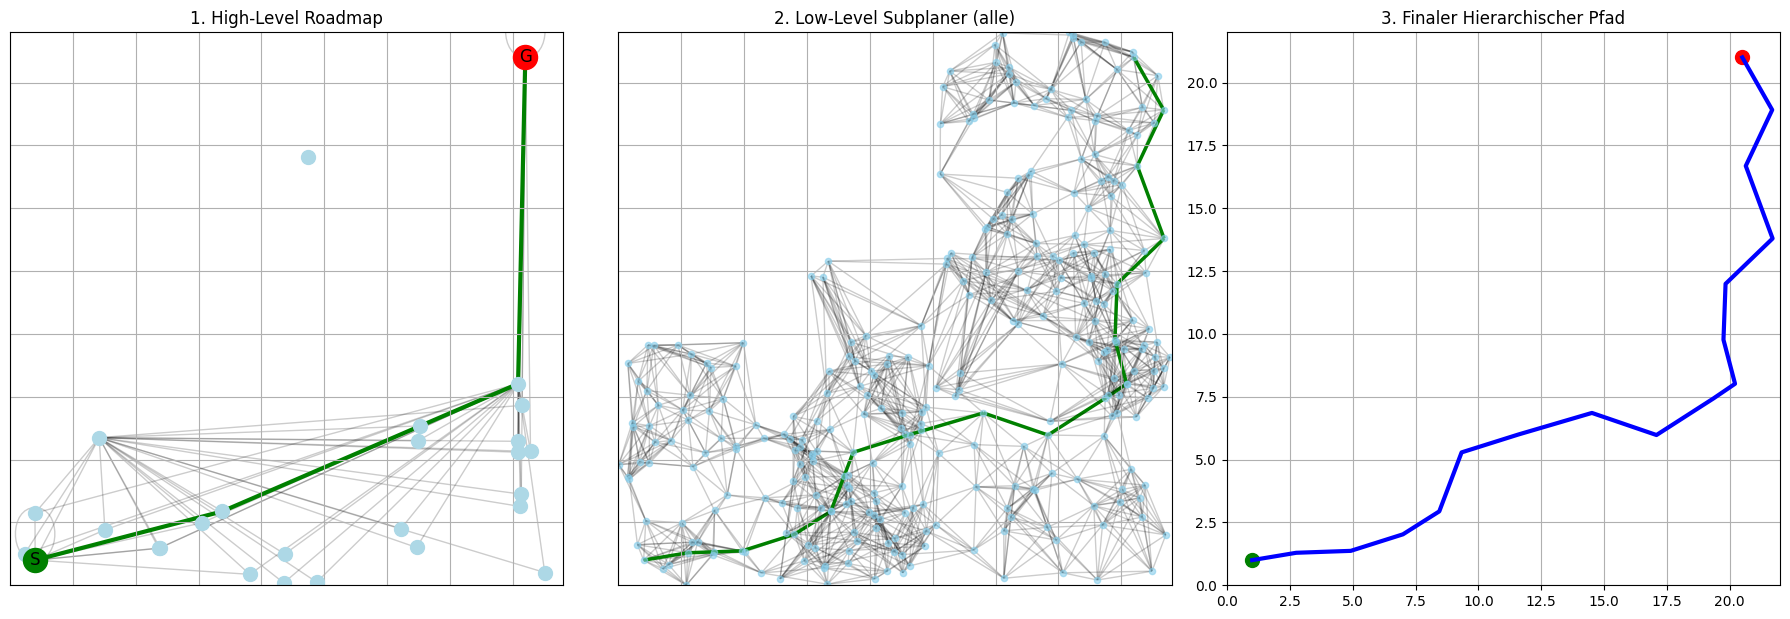


🔄 Verarbeite Szene: Random Obstacles
Globaler Pfad: ['start', 18, 0, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([11.62377229,  3.35396814]), array([19.89586105, 18.82875096]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [11.62377229  3.35396814]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [11.62377229  3.35396814]
   Lokale Begrenzung (geclipped): ((0, np.float64(14.311886144640162)), (0, np.float64(10.176984070081502)))
Segment 1: [11.62377229  3.35396814] → [19.89586105 18.82875096]
→ Lokaler Planner für Segment 1: [11.62377229  3.35396814] → [19.89586105 18.82875096]
   Lokale Begrenzung (geclipped): ((np.float64(7.7598166694409105), 22), (np.float64(3.091359550739117), np.float64(19.091359550739117)))
Segment 2: [19.89586105 18.82875096] → [19.0, 19.0]
→ Lokaler Planner für Segment 2: [19.89586105 18.82875096] → [19.0, 19.0]
   Lokale Begrenzung (geclipped): ((np.float64(18.535848700925524), np.float64(20.36001234867597)), (np.float64(18.002293656782392), np.float64(19

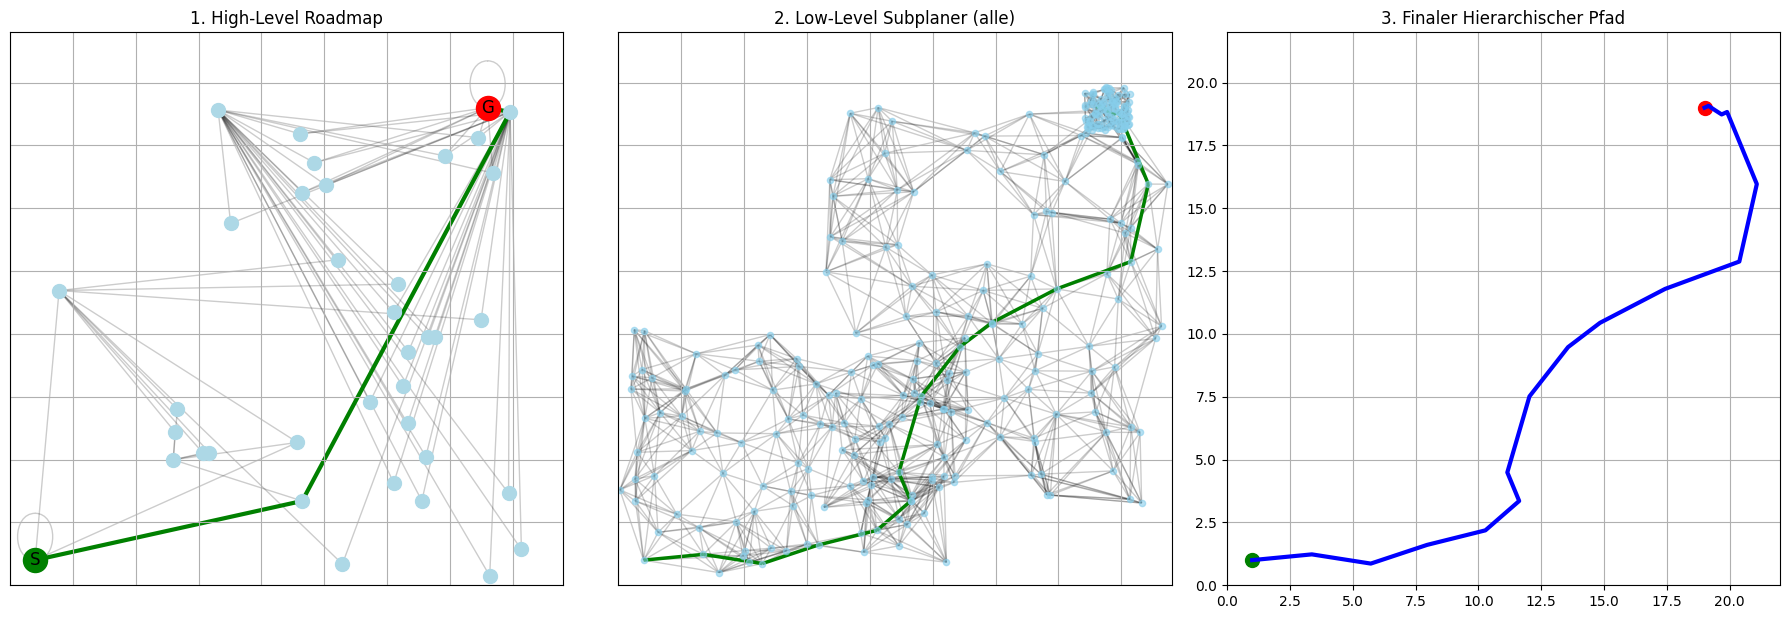

In [7]:
# --- Jede Szene durchlaufen ---
config_low = {
    "initialRoadmapSize": 100,
    "kNearest": 10,
    "maxIterations": 20,
    "updateRoadmapSize": 50
}
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen